#  <font color="darkred"> &#10070; Implémentation des arbres binaires en Python </font>


## <font color="darkblue"> &diams; Rappel de cours</font>

### Définition récursive des arbres binaires

En cours, un arbre binaire a été définie de façon récursive : un arbre binaire est soit vide, soit un triplet formé par l'étiquette du noeud et deux arbres binaires (le sous arbre gauche et le sous arbre droit). Cette définion va nous servir de base pour implémenter en Python les arbres binaires.
En notant $\Delta$ l'abre vide, une définition mathématique d'un arbre binaire pourrait donc être :

$T$ est un arbre binaire si et seulement si 
* $T=\Delta$ ou,
* $T = (v,sag,sad)$ où $sag$  et $sag$ sont des arbres binaires (et $v$ l'étiquette) 

### Programmation orienté objet
D'autre part, comme pour les listes, piles et files, nous utiliserons la programmation orientée objet

Plusieurs implémentation des arbres binaires sont possibles, nous faisons le choix :
* de définir une classe noeud sous la forme d'un triplet (etiquette, fils droit, fils gauche)
* de définir un arbre binaire comme un accès à sa racine

Nous adpotons cette façon de faire car choisir de représenter un arbre avec une seule classe (celle des noeuds) pose le problème de la représentation de l'arbre vide qui n'est pas un triplet.

## <font color="darkblue"> &diams; La classe noeud </font>
 Pas de surprise pour la définition, un noeud est un triplet (étiquette, fils gauche, fils droit) :

In [1]:
# Classe noeud pour un arbre binaire
class Noeud:
    
    def __init__(self, etiquette, gauche, droit):
        self.etiquette = etiquette
        self.gauche = gauche
        self.droit = droit

On utilisera le <code> None </code> de Python pour indiquer qu'un fils est absent.

## <font color=green> &#9998; Exercices </font>
1. <font color=green>En utilisant le constructeur précédent créer:
    * Deux feuilles D et E d'étiquette respectives "D"et "E".
    * C ayant pour fils gauche E (crée ci-dessus), pas de fils droit et pour étiquette "C".
    * B ayant pour fils droit D,  pas de fils gauche et étiquette "B".
    * A ayant pour fils gauche B, fils droit D  et étiquette "A" </font>

In [1]:
# Vos réponse ici


2. <font color="green"> Ajouter à classe noeud ci-dessus une méthode <code>est_feuille</code> qui renvoie <code>True</code> si le noeud est une feuille et <code>False</code> sinon.

In [ ]:
# Recopier la classe noeud et y ajouter la méthode demandée


3. <font color="green"> Modifier le constructeur de la classe noeud de façon à ce que les fils soient <code>None</code> par défaut </font>

In [ ]:
# Recopier la classe noeud et y ajouter la méthode demandée


## <font color="darkblue"> &diams; La classe arbre </font>

On peut maintenant définir un arbre comme un accès au noeud racine. Si cet accès est <code>None</code> alors il s'agit de l'arbre vide.



In [2]:
class ArbreBinaire:
    
    def __init__(self,racine):
        # racine est soit None (arbre vide) soit un objet de la classe noeud
        self.racine=racine

## <font color=green> &#9998; Exercices </font>
4. <font color=green> Compléter la classe  <code>ArbreBinaire</code> en ajoutant une méthode <code>est_vide</code> qui renvoie <code>True</code> lorsque l'abre est vide et <code>False</code> sinon.:

In [2]:
class ArbreBinaire:
    
    def __init__(self,racine):
        # racine est soit None (arbre vide) soit un objet de la classe noeud
        self.racine=racine
        
    #Ajouter la méthode est_vide ici :
    

## <font color="darkblue"> &diams; Premier exemple </font>

Nous allons utiliser cette implémentation des arbres pour représenter l'arbre binaire suivant :
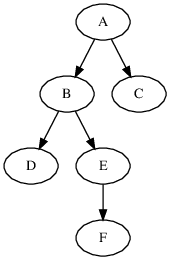

le noeud E, par exemple, a pour fils le noeud F, pour créer E, il faut donc avoir déjà crée F. On doit donc en quelque sorte déclarer les noeuds, à partir des feuilles :

In [3]:
# Par défaut les fils sont à None
C = Noeud("C")
D = Noeud("D")
F = Noeud("F")

In [4]:
# On peut à présent "remonter" dans l'arbre et déclarer les noeuds parents
E = Noeud("E",F)
B = Noeud("B",D,E)

## <font color=green> &#9998; Exercices </font>
5. <font color="green"> De la même façon, définir le noeud A </font>

In [5]:
# Reste le noeud A à définir


## <font color="darkblue"> &diams; Visualisation de l'arbre</font>


Pour visualer l'abre nous allons utiliser une librarie de Python **graphviz** qui permet de visualer les graphes (et donc en particulier les arbres). Les élèves intéressés pourront se renseigner par eux-mêmes sur graphviz, mais ce module ne fait pas partie du programme de terminale et ne sera donc pas évalué.

In [6]:
# Importation de Graphviz
from graphviz import Digraph

La méthode de visualisation de l'arbre est donc fournit tel quel, il vous reste à l'utiliser !

In [45]:
class ArbreBinaire:
    
    def __init__(self,racine):
        # racine est soit None (arbre vide) soit un objet de la classe noeud
        self.racine=racine
    
    # Parcours l'abre en récupérant les noeuds et les arêtes au format utilisé par Digraph
    def arbre_digraph(self):
        noeuds=[]
        aretes=[]
        if self!=None:
            noeuds=[self.racine.etiquette]
            if self.racine.gauche!=None:
                aretes.append([self.racine.etiquette,self.racine.gauche.etiquette])
                sag = ArbreBinaire(self.racine.gauche)
                pg = sag.arbre_digraph()
                noeuds = noeuds + pg[0]
                aretes = aretes + pg[1]
            if self.racine.droit!=None:
                aretes.append([self.racine.etiquette,self.racine.droit.etiquette])
                sad = ArbreBinaire(self.racine.droit)
                pd = sad.arbre_digraph()
                noeuds = noeuds + pd[0]
                aretes = aretes + pd[1]
        return noeuds,aretes
            
    def affiche(self):
        # création de l'objet graphviz qui sera renvoyé
        img_arbre = Digraph()
        noeuds, aretes = self.arbre_digraph()
        for n in noeuds:
            img_arbre.node(n,n)
        for a in aretes:
            img_arbre.edge(a[0],a[1])
        return img_arbre
        

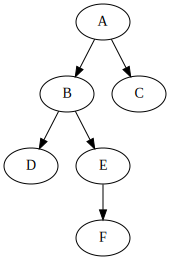

In [46]:
# on crée l'arbre de racine A et on l'affiche !
arbre = ArbreBinaire(A)
arbre.affiche()

## <font color=green> &#9998; Exercices </font>
5. <font color=green>Utiliser la classe Arbre pour définir un arbre binaire complet de profondeur 2. Afficher sa visualisation (on utilisera les lettres de l'alphabet comme etiquette des noeuds)</font>

In [ ]:
# Votre réponse ici


6. <font color=green>Utiliser la classe Arbre pour définir un arbre binaire dégénéré de taille 5. Afficher sa visualisation (on utilisera les lettres de l'alphabet comme etiquette des noeuds)</font>

In [ ]:
# Votre réponse ici


## <font color="darkblue"> &diams; Taille d'un arbre</font>

On veut compléter notre classe <code>ArbreBinaire</code> par une méthode qui renvoie la taille de l'arbre (c'est à dire son nombre de noeud). Notre structure de donnée étant récursive, cette méthode sera codée de façon récursive :
* Si $T$ est vide alors sa taille est 0
* Sinon  $taille(T)=1 + taille(sag) + taille(sad)$

On doit donc ajouter à la classe <code>ArbreBinaire</code> la méthode suivante :

In [1]:
    def taille(self):
        if self.racine==None:
            return __
        else:
            sag = ArbreBinaire(self.racine.gauche)
            sad = ArbreBinaire(self.racine.droit)
            return 1+_________+_________

## <font color=green> &#9998; Exercices </font>
7. <font color=green>Recopier et compléter cette méthode dans la classe <code>ArbreBinaire</code> ci-dessous. Tester votre méthode sur l'arbre de racine A et sur les arbres des exercices 5 et  6.</font>

In [ ]:
#



## <font color="darkblue"> &diams; Hauteur d'un arbre</font>

## <font color=green> &#9998; Exercices </font>

8. <font color=green>Compléter la définition <strong>récursive</strong> de la hauteur d'un abre binaire. donnée ci-dessous</font>

On note h(T) la hauteur d'un arbre binaire T, alors :
* Si T est vide, h(T)=...
* Sinon h(T) = ... + ...(sag(T),sad(T)) où sag(T) et sad(T) sont les sous arbres droits et gauche de T.

9. <font color=green>Compléter la classe <code>ArbreBinaire</code> en y écrivant une méthode <code>hauteur</code> qui calcule récursivement la hauteur de cet arbre. Tester cette méthode</font>

In [ ]:
# Votre réponse ici
